In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
m=2129

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/raw/visualize - non cheat.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:1500]


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/subject 2 nimesha.csv',names=["t","X", "Y"])
t_df = df[21847:21868]['t'].values.tolist()
x= df[21842:21846]
df=df[:21841]
# df=df[:3000]
# df.tail(42)

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/subject 3 - nimesha.csv',names=["t","X", "Y"])
t_df = df[12676:]['t'].values.tolist()
x= df[12671:12675]['t'].values.tolist()
df=df[:-11]
df['t']=(df['t']-df['t'][0])/1000

In [ ]:
m=24502

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/subject 4 - kesavan.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:9000]
df['t']=(df['t']-df['t'][0])/1000

In [ ]:
m=12296

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/test1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000

In [ ]:
m=18108

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/subject 5- chathmini.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:3000]
df['t']=(df['t']-df['t'][0])/1000

In [ ]:
x
# t_df

[-5.0, 1493.0, 819.0, 50.0]

In [ ]:
x_min = x[0]
x_max =x[1]
y_max =x[2]
y_min =x[3]

status=-1
c=0
k=0
for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    c=c+row['t']
    df.loc[index,'status']= 1
    df.loc[index,'elapased_time']= c
    k=0
  else:
    k=k+row['t']
    df.loc[index,'status']= 0
    df.loc[index,'elapased_time']=k
    c=0
df.head()


,t,X,Y,status,elapased_time
0,0.0000,928.56,-127.90,1.0,0.0000
1,0.0370,929.61,-83.60,1.0,0.0370
2,0.1038,928.54,-34.97,1.0,0.1408
3,0.1507,910.52,-17.71,1.0,0.2915
4,0.2030,917.71,-22.30,1.0,0.4945


In [ ]:
t_df

[]

Text(0, 0.5, 'Status')

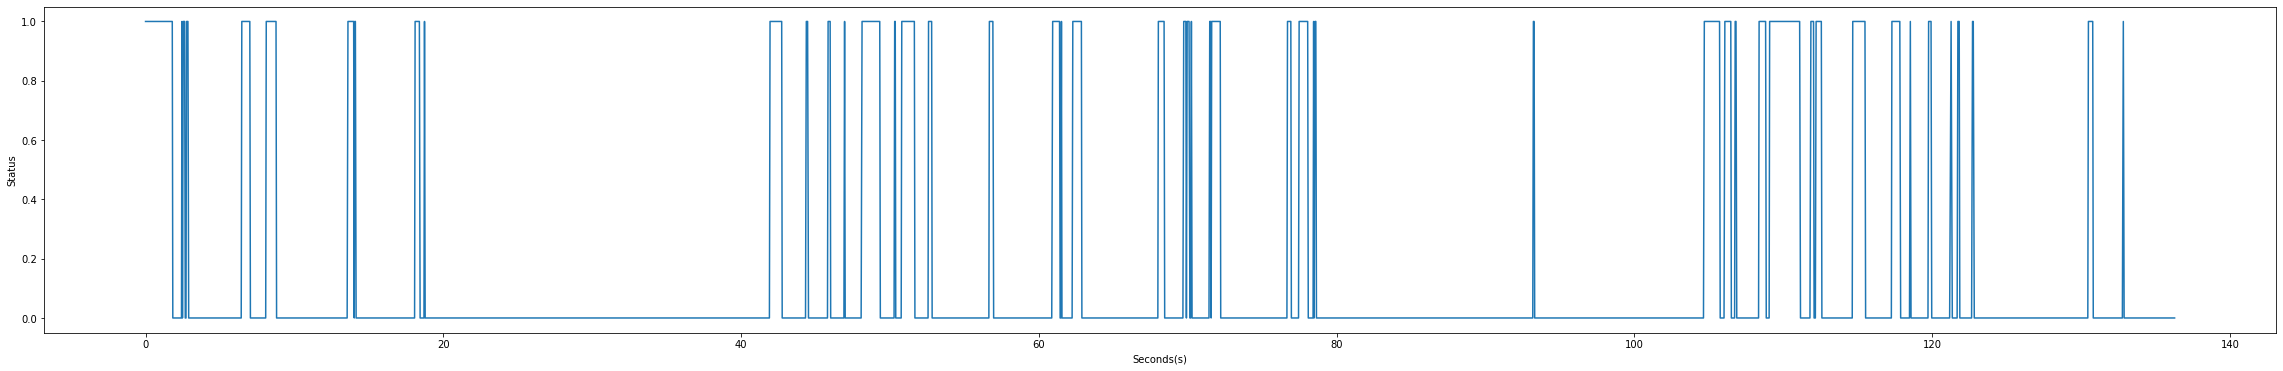

In [ ]:
plt.figure(figsize=(40, 6))
plt.plot(df['t'],df['status'])

plt.xlabel("Seconds(s)")
plt.ylabel("Status")
# for i in range(0,len(t_df)-1,2):
  # plt.plot([t_df[i],t_df[i+1]],[0,0],c='r') 
# plt.plot([72.687, 91.969],[0,0],c='r') 
# 72687.0	
# 91969.0

In [ ]:

x_min = x[0]
x_max =x[1]
y_max =x[2]
y_min =x[3]


data = {'status': [], 'elapased_time': []}
df_new = pd.DataFrame(data)

status=-1
t=0
k=0


for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    if status==0:
      df_new=df_new.append({'status':0,'elapased_time':row['t']-t},ignore_index=True)
      t=row['t']
      # print(status,c)
      # c=0
    status= 1
    # c=c+row['t']
  else:
    if status==1:
      df_new=df_new.append({'status':1,'elapased_time':row['t']-t},ignore_index=True)
      t=row['t']
      # c=0
    status= 0
    # c=c+row['t']
df_new=df_new.append({'status':status,'elapased_time':df['t'].iloc[-1]-t},ignore_index=True)
# new_dtypes = {"status": int, "elapased_time": int}
# df_new = df_new.astype(new_dtypes) 



In [ ]:
df_new.head(10)

,status,elapased_time
0,1.0,1.8320
1,0.0,0.6150
2,1.0,0.0336
3,0.0,0.0551
4,1.0,0.1329
5,0.0,0.0902
6,1.0,0.1398
7,0.0,3.5681
8,1.0,0.5775
9,0.0,1.0649


Text(0, 0.5, 'Elapsed_time(s)')

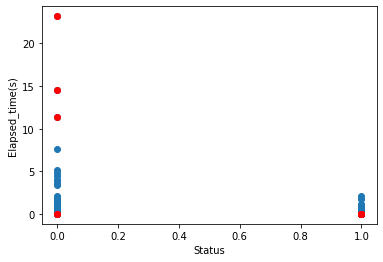

In [ ]:
from sklearn.svm import OneClassSVM
from numpy import where
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.1)
svm.fit(df_new)
pred = svm.predict(df_new)
anom_index = where(pred==-1) 
values = df_new.loc[anom_index]
df_new['svm_p']=pred
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')
plt.xlabel("Status")
plt.ylabel("Elapsed_time(s)")

In [ ]:
df_new['cum_sum'] = df_new['elapased_time'].cumsum(axis = 0)

In [ ]:
df_new.head()

,status,elapased_time,svm_p,cum_sum
0,1.0,1.8320,1,1.8320
1,0.0,0.6150,1,2.4470
2,1.0,0.0336,-1,2.4806
3,0.0,0.0551,-1,2.5357
4,1.0,0.1329,1,2.6686


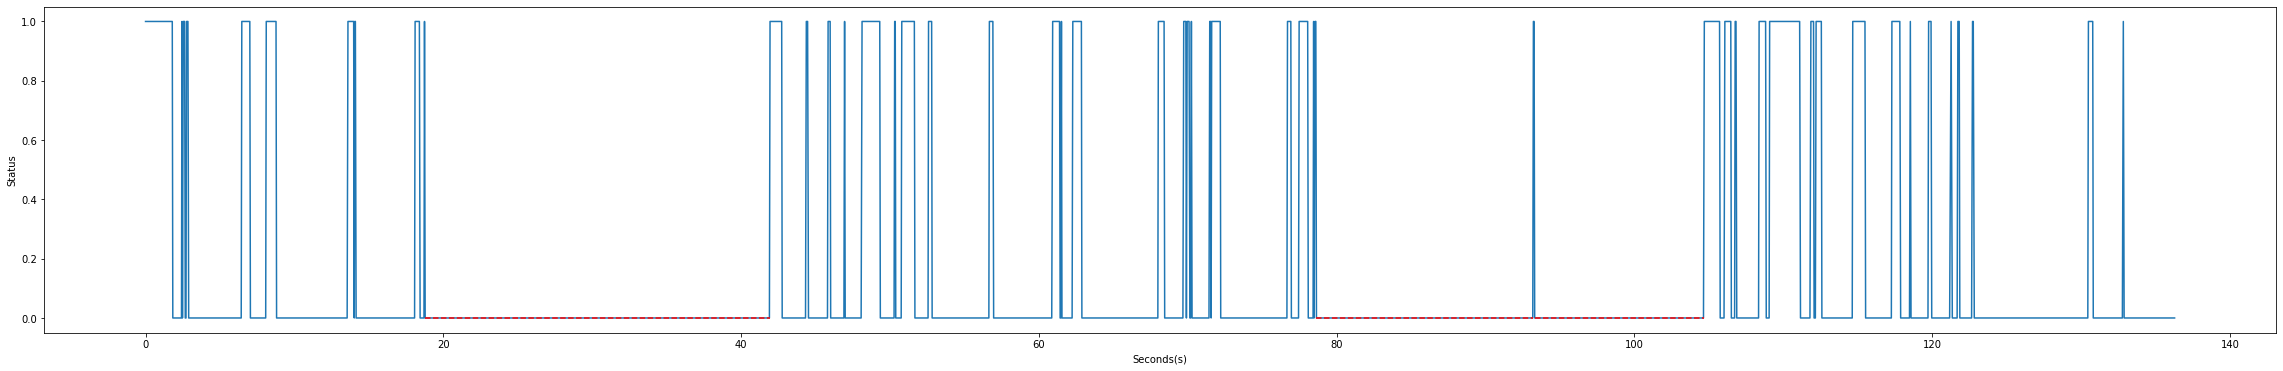

In [ ]:
min = df_new['elapased_time'][(df_new['svm_p']==-1) & (df_new['elapased_time']<2)].max()
plt.figure(figsize=(40, 6))
plt.plot(df['t'],df['status'])

plt.xlabel("Seconds(s)")
plt.ylabel("Status")

for index, row in df_new.iterrows():
  if row['svm_p'] == -1 and row['elapased_time']>min:
    plt.plot([row['cum_sum']-row['elapased_time'],row['cum_sum']],[row['status'],row['status']],c='r',linestyle="--")

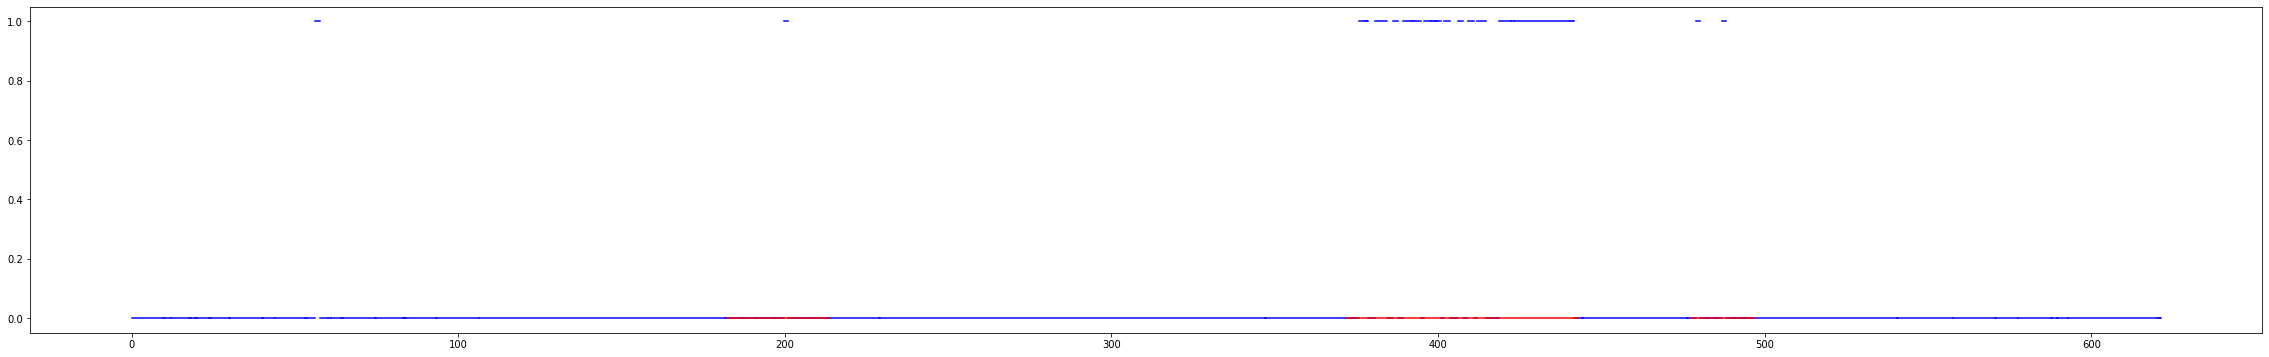

In [ ]:

plt.figure(figsize=(40, 6))
# plt.plot(df['t'],df['status'])
status=0
for index, row in df_new.iterrows():
  # if (row['elapased_time']>=0.5):
    # df_new.loc[index,'status']= status
  plt.plot([row['cum_sum']-row['elapased_time'],row['cum_sum']],[row['status'],row['status']],c='b')  
  # status=row['status']
# df_new.tail()

for i in range(0,len(t_df)-1,2):
  plt.plot([t_df[i]/1000,t_df[i+1]/1000],[0,0],c='r')

In [ ]:
status=0
for index, row in df_new.iterrows():
  if (row['elapased_time']<1.0):
    df_new.loc[index,'status']= status
  status=row['status']

df_new.head(10)


,status,elapased_time,cum_sum
0,0.0,9.4897,9.4897
1,0.0,0.7725,10.2622
2,0.0,1.8105,12.0727
3,0.0,0.1062,12.1789
4,0.0,5.2923,17.4712
5,0.0,0.6831,18.1543
6,0.0,1.3996,19.5539
7,0.0,0.1016,19.6555
8,0.0,0.0899,19.7454
9,0.0,0.2923,20.0377


In [ ]:
plt.scatter(df['t'],df['status'])